# CHAP10. XGBoost

10.2 데이터 불러오기/확인하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url= 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data= pd.read_csv(file_url)
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [ ]:
pd.options.display.max_columns= 40
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [ ]:
round(data.describe(),2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


통계 정보 확인. 최댓값에 주목. 평가 스케일이 다름을 알아야함.

# 10.3 전처리: 결측치 처리

In [ ]:
data.isna().mean()

,0
has_null,0.000000
gender,0.000000
age,0.011339
age_o,0.012413
race,0.007520
race_o,0.008713
importance_same_race,0.009429
importance_same_religion,0.009429
pref_o_attractive,0.010623
pref_o_sincere,0.010623


결측치 비율을 확인. 대체로 5% 미만임을 확인함.

In [ ]:
data= data.dropna(subset= ['pref_o_attractive','pref_o_sincere','pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests','attractive_important','sincere_important','intellicence_important','funny_important','ambtition_important','shared_interests_important'])
data= data.fillna(-99)

다음 변수들에 대해 결측치를 제거한 후 나머지 변수들의 결측치는 -99로 대체.

# 10.4 피처 엔지니어링

In [ ]:
def age_gap(x):
  if x['age'] == -99:
    return -99
  elif x['age_o'] == -99:
    return -99
  elif x['gender'] == 'female':
    return x['age_o'] - x['age']
  else:
    return x['age'] - x['age_o']


결측치 제외 성별을 기준으로 (남-여)로 나이 계산 => 남자가 연상이면 +, 여자가 연상이면 - 값 출력

In [ ]:
data['age_gap'] = data.apply(age_gap, axis=1)
data['age_gap_abs'] = abs(data['age_gap'])

데이터프레임에 나이차(+/-), 그리고 절댓값 컬럼을 추가한다. 나이에 대한 전처리는 끝.

In [ ]:
def same_race(x):
  if x['race'] == -99:
    return -99
  elif x['race_o']== -99:
    return -99
  elif x['race'] == x['race_o']:
    return 1
  else:
    return -1

data['same_race'] = data.apply(same_race, axis=1)

같은 인종인지에 대한 여부를 same_race 함수로 표현하여 또다른 컬럼을 추가한다.

In [ ]:
def same_race_point(x):
  if x['same_race'] == -99:
    return -99
  else:
    return x['same_race']*x['importance_same_race']

동일 인종 여부의 중요성을 변별하기 위해 같을 때/다를 때를 1과 -1로 표현했고, 결과적으로 동일 인종을 중시하는 사람들이 다른 인종과 매칭됐을 때와 동일 인종이 아니어도 상관없는 사람들이 다른 인종과 매칭됐을 때를 구분할 수 있게 된다.

In [ ]:
def rating(data, importance, score):
  if data[importance] == -99:
    return -99
  elif data[score] == -99:
    return -99
  else:
    return data[importance]*data[score]

In [ ]:
data.columns[8:14]
partner_imp = data.columns[8:14]
partner_rate_me = data.columns[14:20]
my_imp = data.columns[20:26]
my_rate_partner = data.columns[26:32]

여기서 겹치는 컬럼이 있는건지? => 첫 인덱스는 포함, 끝 인덱스는 제외

In [ ]:
new_label_partner = ["attractive_p", 'sincere_partner_p','intelligence_p','funny_p','ambition_p','shared_interests_p']
new_label_me = ['attractive_m','sincere_partner_m','intelligence_m','funny_m','ambition_m','shared_interests_m']

내가 보는 가중치 점수, 상대방이 보는 가중치 점수를 각각 산출한다는 의미.

In [ ]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
  data[i] = data.apply(lambda x: rating(x,j,k), axis=1)

In [ ]:
for i,j,k in zip(new_label_me, my_imp, my_rate_partner):
  data[i] = data.apply(lambda x: rating(x,j,k), axis=1)

In [ ]:
data= pd.get_dummies(data, columns= ['gender', 'race','race_o'], drop_first=True)

더미 변수로 변환

# 10.5 모델링 및 평가

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['match'], axis=1),
data['match'], test_size=0.2, random_state=100)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state=100)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pred= model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8653136531365314

In [ ]:
print(confusion_matrix(y_test, pred))

[[1292   73]
 [ 146  115]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.61      0.44      0.51       261

    accuracy                           0.87      1626
   macro avg       0.76      0.69      0.72      1626
weighted avg       0.85      0.87      0.86      1626



#10.6 경사하강법

지역 최솟값에서 전역 최솟값으로 나아가게 하는 구체적인 방법? 그저 학습량을 늘리면 되는 것인가? 아니면 미분계수가 0인 지점의 함수값을 비교? => 학습률을 늘리는 것(보폭).

그렇다면 학습률은 일정한 값이 아닌것인가? 가운데 그래프의 학습률은 일정하지 않아 보임.

#10.7 그리드 서치


In [ ]:
max_depth = [3,5,10]
learaning_rate = [0.01, 0.05, 0.1]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5,7,10],
    'subsample': [0.5,0.7,1],
    'n_estimators': [300,500,1000]
}

하이퍼파라미터 셋 정의

In [ ]:
model= xgb.XGBClassifier()

In [ ]:
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring= 'f1', cv = 5)

In [38]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [39]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 1}

최적의 하이퍼 파라미터 조합 출력

In [40]:
pred= gs_model.predict(X_test)

자동으로 최적의 하이퍼파라미터 적용됨

In [41]:
accuracy_score(y_test, pred)

0.8671586715867159

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.62      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.76      0.70      0.72      1626
weighted avg       0.85      0.87      0.86      1626



# 10.8 중요 변수 확인

그리드 서치로 학습된 모델은 중요 변수 확인 불가!!

In [45]:
model= xgb.XGBClassifier(learning_rate=0.3, max_depth =5,
                         n_estimators =1000, subsample =0.5, random_state=100)

In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [47]:
model.feature_importances_

array([0.01586595, 0.01235557, 0.01044724, 0.01001983, 0.01387342,
       0.01477067, 0.01103949, 0.01793085, 0.0104293 , 0.01410716,
       0.01379533, 0.04323881, 0.01073177, 0.0124897 , 0.03158113,
       0.0160627 , 0.02031418, 0.01694684, 0.01103375, 0.0167414 ,
       0.01281194, 0.0101479 , 0.01130493, 0.03026025, 0.01483808,
       0.01391515, 0.02277108, 0.01180364, 0.02025728, 0.01203606,
       0.01523602, 0.01772266, 0.06260824, 0.01987644, 0.03016517,
       0.01308646, 0.01306281, 0.00933726, 0.01333864, 0.01370918,
       0.0136942 , 0.01388029, 0.00925415, 0.01033771, 0.01171834,
       0.01050856, 0.01314946, 0.01318295, 0.01193377, 0.01165085,
       0.0087563 , 0.02037439, 0.01390771, 0.03071883, 0.03673597,
       0.02347792, 0.01097447, 0.01984259, 0.02383717], dtype=float32)

In [48]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})

In [49]:
feature_imp.head()

,features,values
0,has_null,0.015866
1,age,0.012356
2,age_o,0.010447
3,importance_same_race,0.010020
4,importance_same_religion,0.013873


<Axes: xlabel='values', ylabel='features'>

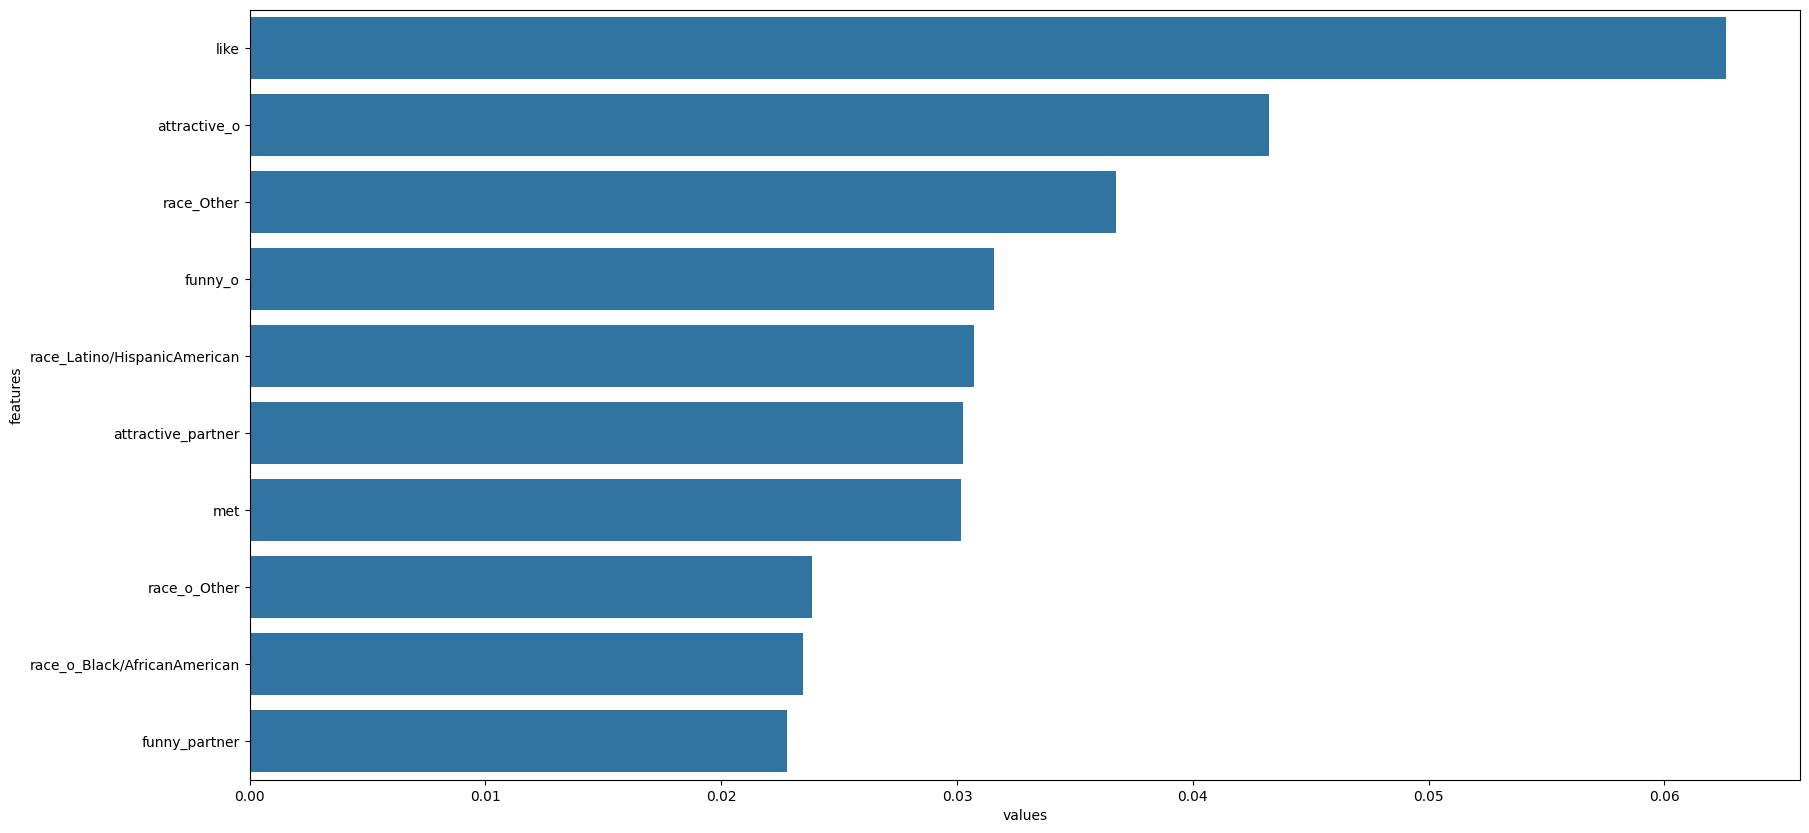

In [51]:
plt.figure(figsize= (20,10))
sns.barplot(x='values', y='features',
            data= feature_imp.sort_values(by='values', ascending=False).head(10))

여기서의 values는 상대적인 중요도, 그리고 중요하다고 나타난 변수들이 긍정인지 부정인지까지는 모르므로 주의 !!

#10.9 이해하기

배깅: 부트스트랩 모델 활용/독립적 학습 -> 발전한 형태: 랜덤 포레스트

-> 발전한 형태: 부스팅: 독립x. 이전 트리의 결과를 이용

경사 부스팅과 XGBoost: 경사하강법 이용, 이전 모델의 에러 기반으로 다음 모델 만듦. 성능 좋으나 과적합 위험. -> 정규화 하이퍼파라미터

에이다부스트와 경사 부스팅의 차이?
=> 둘다 이전 모델에서의 오류를 학습해 고쳐나가는 것은 동일. 하지만 오류를 인식하는 방식에 차이가 있음. 에이다부스트는 샘플 단위로 오류에 집중함. (틀린 문제만 계속 더 공부하는 것). 경사 부스팅은 잔차에 집중해 모델 정확도를 높이는 데 집중(전체 성적 평균을 올리기)